In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


## Test Model

In [3]:
model = YOLO("/home/mahfuj/Projects/PERSONAL/football-game-analysis/runs/detect/train/weights/best.pt")
model = model.cuda()


image 1/1 /home/mahfuj/Projects/PERSONAL/football-game-analysis/football-players-detection/valid/images/2e57b9_9_1_png.rf.87b260e714b9f6af5288301e51014dc4.jpg: 384x640 1 goalkeeper, 16 players, 3 referees, 15.8ms
Speed: 1.1ms preprocess, 15.8ms inference, 46.5ms postprocess per image at shape (1, 3, 384, 640)


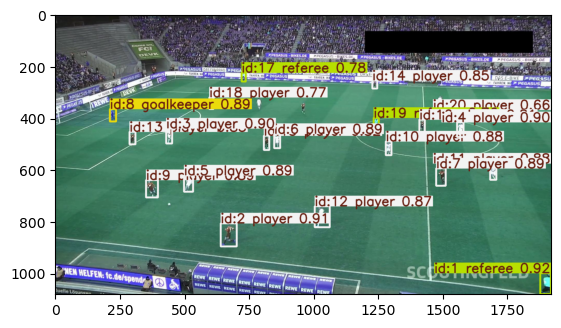

In [4]:
results = model.track("/home/mahfuj/Projects/PERSONAL/football-game-analysis/football-players-detection/valid/images/2e57b9_9_1_png.rf.87b260e714b9f6af5288301e51014dc4.jpg")
plt.imshow(results[0].plot())

In [5]:
id2name = results[0].names
print(id2name)

{0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}


In [6]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2.])
conf: tensor([0.9196, 0.9070, 0.8969, 0.8958, 0.8942, 0.8920, 0.8877, 0.8860, 0.8853, 0.8826, 0.8820, 0.8736, 0.8529, 0.8472, 0.8184, 0.8140, 0.7846, 0.7720, 0.7568, 0.6635])
data: tensor([[1.8780e+03, 9.9920e+02, 1.9195e+03, 1.0800e+03, 1.0000e+00, 9.1959e-01, 3.0000e+00],
        [6.4105e+02, 8.0791e+02, 7.0315e+02, 8.9602e+02, 2.0000e+00, 9.0704e-01, 2.0000e+00],
        [4.3092e+02, 4.4136e+02, 4.5317e+02, 4.9920e+02, 3.0000e+00, 8.9686e-01, 2.0000e+00],
        [1.5565e+03, 4.1744e+02, 1.5816e+03, 4.7459e+02, 4.0000e+00, 8.9579e-01, 2.0000e+00],
        [4.9928e+02, 6.2215e+02, 5.3412e+02, 6.8519e+02, 5.0000e+00, 8.9418e-01, 2.0000e+00],
        [8.4865e+02, 4.6262e+02, 8.7168e+02, 5.1741e+02, 6.0000e+00, 8.9197e-01, 2.0000e+00],
        [1.4756e+03, 5.9519e+02, 1.5122e+03, 6.6227e+02, 7.0000e+00, 8.8774e-01, 2.0000e+00],
        [

In [8]:
import cv2
import time

# Open the video file or camera
cap = cv2.VideoCapture('input_video/video3.mp4')

# Desired frame dimensions
height, width = 1280, 720

# Set desired FPS
desired_fps = 40
frame_interval = 1 / desired_fps  # Time per frame in seconds

if not cap.isOpened():
    print("Cannot open video")
    exit()

while True:
    start_time = time.time()

    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Resize the frame
    frame = cv2.resize(frame, (height, width))



    # Model infarence
    results = model.track(frame, conf=0.4)

    for result in results:
        boxes = result.boxes
        for bbox in boxes:
            for box in bbox.xyxy:
                x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
                className = id2name[int(bbox.cls.item())]

                # Color of the boxes
                if className == "ball":
                    color = (255,0,0)
                elif className == "player":
                    color = (0,190,0)
                elif className == "referee":
                    color = (0,255,255)
                elif className == "goalkeeper":
                    color = (255,255,0)

                # if classname == "player":
                #     cut_player_image = frame[y1:y2, x1:x2]
                #     cv2.imwrite('player.png', cut_player_image)
                
                # cv2.rectangle(frame, (x1,y1), (x2,y2), color, 1)
                # cv2.putText(frame, f"{ classname }", (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
                
                # Draw elipses
                if className == "player" or className == "referee" or className == "goalkeeper":
                    frame_width = x2 - x1
                    frame = cv2.ellipse(
                        frame,
                        center = ( (x1 + x2) // 2, y2 ),
                        axes = ( int(frame_width), int(0.35*frame_width) ),
                        angle = 0,
                        startAngle = -45, 
                        endAngle = 235, 
                        color = color,
                        thickness = 2,
                        lineType = cv2.LINE_4
                    )





    # Display the frame
    cv2.imshow('Video Feed', frame)

    # Calculate the time elapsed
    elapsed_time = time.time() - start_time

    # Sleep for the remaining time to maintain desired FPS
    if elapsed_time < frame_interval:
        time.sleep(frame_interval - elapsed_time)

    # Press 'q' to quit
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


0: 384x640 1 goalkeeper, 18 players, 3 referees, 4.7ms
Speed: 10.9ms preprocess, 4.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 3 referees, 4.6ms
Speed: 0.9ms preprocess, 4.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 3 referees, 4.7ms
Speed: 0.9ms preprocess, 4.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 3 referees, 4.2ms
Speed: 0.9ms preprocess, 4.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 3 referees, 4.3ms
Speed: 1.0ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 3 referees, 4.7ms
Speed: 1.0ms preprocess, 4.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 3 referees, 4.2ms
Speed: 1.0ms preprocess, 4.2ms 

## Recognize the team from color

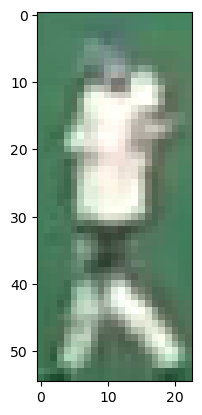

In [22]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans


player_img = cv2.imread("output_videos/player.png")
plt.imshow(player_img)

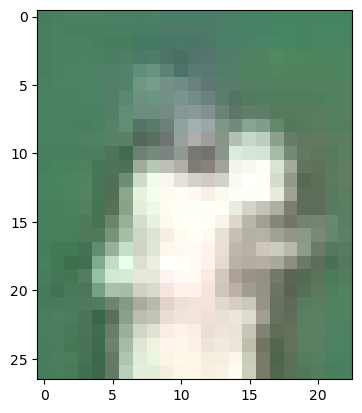

In [23]:
top_half = player_img[ 0: int(player_img.shape[0] // 2), : ]
plt.imshow( top_half )

### Cluster in two clusters

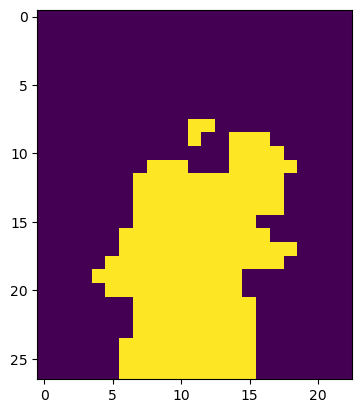

In [25]:
image_2d = top_half.reshape(-1,3)

kmeans = KMeans(n_clusters = 2, random_state = 0 )
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_img = labels.reshape(top_half.shape[0], top_half.shape[1])  

plt.imshow( clustered_img )

In [31]:
corner_clusters = [clustered_img[0,0], clustered_img[0,-1], clustered_img[-1,0], clustered_img[-1,-1]]
non_player_cluster = max( set(corner_clusters), key=corner_clusters.count )
non_player_cluster

0

In [34]:
player_cluster = 1 - non_player_cluster
player_cluster

1

In [38]:
color = tuple(kmeans.cluster_centers_[player_cluster])
color

(223.9314285714284, 224.0971428571429, 211.93714285714304)